# READ ME 
# DETAILS OF THE PROBLEM 


* ENVIRONMENT:
  * GRID-ENVIIRONMENT 
  * DETERMINISTIC MOVEMENT 
  * CUSTOMERS AS OBSTACKLES


* AGENTS:
  * 1 Q-AGENT 
  * 1 SARSA AGENT
  * 1 RANDOM AGENT
  
  
* Q-AGENT:
  * Trained with E-greedy. (From 1.0 decays to 0.05)
  * Episode count { 20K }
  * Maximum step count { 20 } 


* SARSA-AGENT:
  * Trained with E-greedy. (From 1.0 decays to 0.05)
  * Episode count { 20K } 
  * Maximum step count { 20 } 


* Reward Metrics
  * Number of steps per batch of { 1000 }  episodes
  * Reward per batch of episodes, batch= { 1000 }
  * Percentage of sucessful episodes per batch= { 1000 }  / Percentage of failed episodes per batch
  * Showing convergence with testing by applying the test() function


* PROBLEM:
  * PATH-FINDING. The Agent Must find a path from A to P to follow, that does not hit the customers.
  * The state of the Agent is the location that they find themsleves  in on the grid. Starting state is always location A.
  * The Agents actions are ={UP,DOWN,LEFT,RIGHT}


### Hyper-parameters of Agents

| Parameter | Value |
| --------- | ----- |
| Learning rate | 0.5 |
| Discount factor  | 0.5 |
| Episodes | { 20k } |
| Maximum Steps | { 20 } |
| Epsilon start  | 1.0 |
| Epsilon minimum | 0.05 |
| Epsilon decay | 0.9997 |



## Other Observations and Implementation details

* Training the Q Agent with e-greedy means the the policy slowly moves from stochastic to deterministic.
* The Random agent is a Q Agent with e=1, and no decay, so the agent always takes random actions
* The obstacles in the Grid have negative reward of -100 assigned to them, so that the agent can learn to avoid them
* Each training episode starts from location "A", the goal of the agent is to reach location "P".
* The Agents are not allowed to stay still, ( loop to the same state)
* There may be several optimal paths from a location, to the terminal state. For example from state A to P, there exist 2 optimal paths





## FLOW OF THE NOTEBOOK 


* Environment set-up  (R and Q Matrix)

* Q_Agent class set-up

* Q_Agent Training 
* Q_Agent Performance Metrics
* Q_Agent testing with e=0


<=============>
* SARSA_Agent class set-up

* SARSA_Agent Training 
* SARSA_Agent Performance Metrics


<==============>

* Random agent training 
* Random agent Performance metrics 

===============>
* Q_AGENT VS SARSA_AGENT VS RANDOM AGENT PERFORMANCE

# Environment SET-UP




In [1]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
import pandas as pd
import numpy as np
import pandas as pd
import time
#from google.colab import drive
#drive.mount('/gdrive')
#%#cd /gdrive

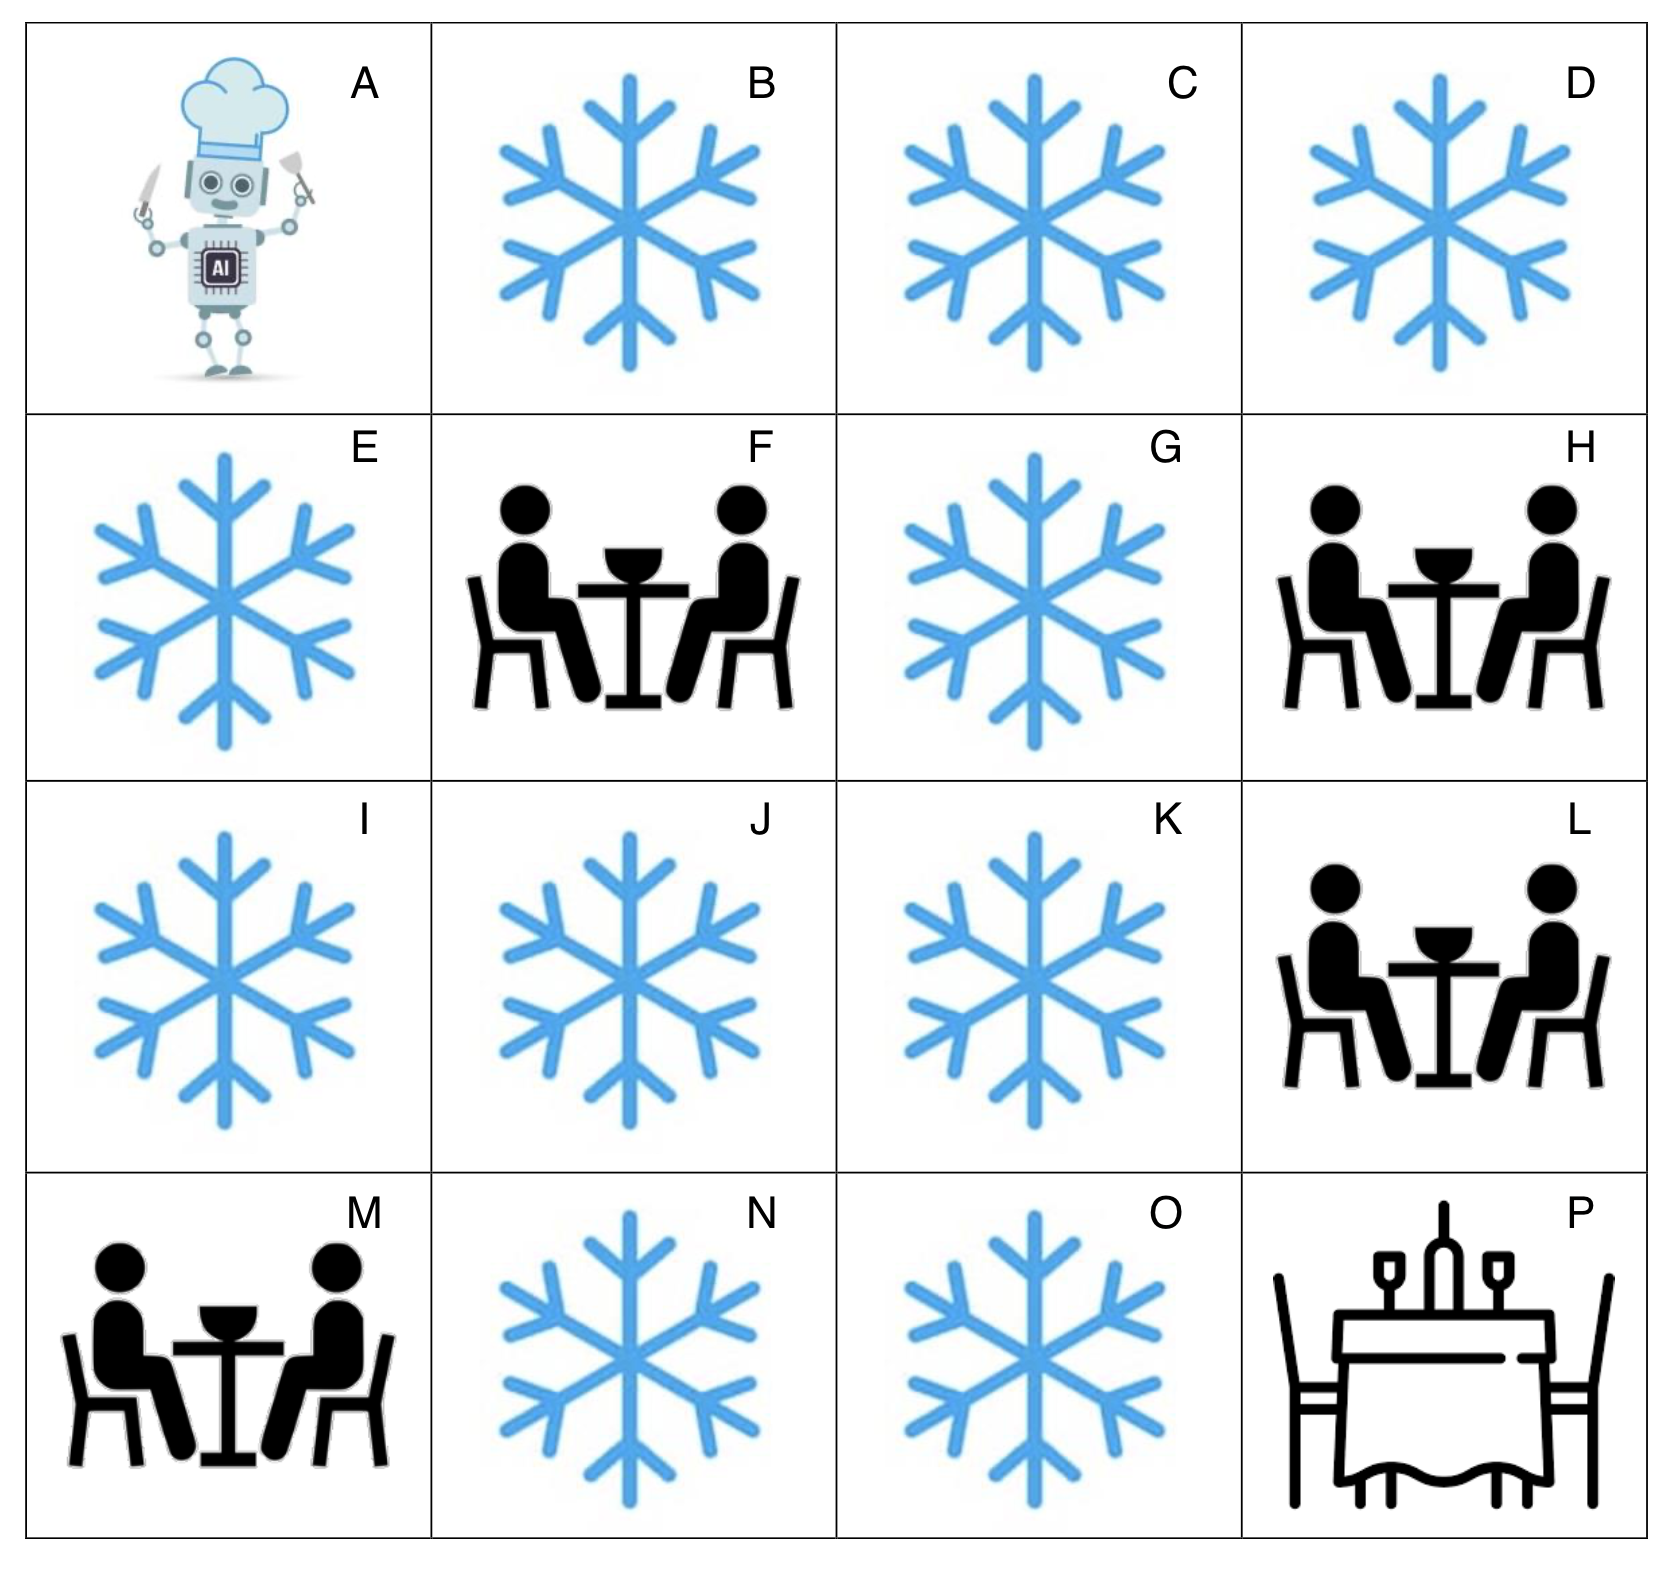

In [2]:
from IPython.display import Image
Image("environment.png",width=500, height=500)

## SET UP OF MODEL ENVIRONMENT 


    Observation Space
    Action Space 
    Reward Matrix
    

In [3]:
S = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P'] 

A = ['Up', 'Down', 'Left', 'Right']

R = [[np.NaN, 0, np.NaN, 0],
     [np.NaN, -100, 0, 0],
     [np.NaN, 0, 0, 0],
     [np.NaN, -100, 0, np.NaN],
     [0, 0, np.NaN, -100],
     [0, 0, 0, 0],
     [0, 0, -100, -100],
     [0, -100, 0, np.NaN],
     [0, -100, np.NaN, 0],
     [-100, 0, 0, 0],
     [0, 0, 0, -100],
     [-100, 100, 0, np.NaN],
     [0, np.NaN, np.NaN, 0],
     [0, np.NaN, -100, 0],
     [0, np.NaN, 0, 100],
     [-100, np.NaN, 0, np.NaN]]

R = pd.DataFrame(columns=A,index=S,data=R) #Reward Matrix

Q = [[np.NaN, 0, np.NaN, 0],
      [np.NaN, 0, 0, 0],
      [np.NaN, 0, 0, 0],
      [np.NaN, 0, 0, np.NaN],
      [0, 0, np.NaN, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, np.NaN],
      [0, 0, np.NaN, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, np.NaN],
      [0, np.NaN, np.NaN, 0],
      [0, np.NaN, 0, 0],
      [0, np.NaN, 0, 0],
      [0, np.NaN, 0, np.NaN]]

Q = pd.DataFrame(columns=A,index=S,data=Q) # Q Matrix

In [4]:
print(R)
print('\n')
print(Q)

      Up   Down   Left  Right
A    NaN    0.0    NaN    0.0
B    NaN -100.0    0.0    0.0
C    NaN    0.0    0.0    0.0
D    NaN -100.0    0.0    NaN
E    0.0    0.0    NaN -100.0
F    0.0    0.0    0.0    0.0
G    0.0    0.0 -100.0 -100.0
H    0.0 -100.0    0.0    NaN
I    0.0 -100.0    NaN    0.0
J -100.0    0.0    0.0    0.0
K    0.0    0.0    0.0 -100.0
L -100.0  100.0    0.0    NaN
M    0.0    NaN    NaN    0.0
N    0.0    NaN -100.0    0.0
O    0.0    NaN    0.0  100.0
P -100.0    NaN    0.0    NaN


    Up  Down  Left  Right
A  NaN   0.0   NaN    0.0
B  NaN   0.0   0.0    0.0
C  NaN   0.0   0.0    0.0
D  NaN   0.0   0.0    NaN
E  0.0   0.0   NaN    0.0
F  0.0   0.0   0.0    0.0
G  0.0   0.0   0.0    0.0
H  0.0   0.0   0.0    NaN
I  0.0   0.0   NaN    0.0
J  0.0   0.0   0.0    0.0
K  0.0   0.0   0.0    0.0
L  0.0   0.0   0.0    NaN
M  0.0   NaN   NaN    0.0
N  0.0   NaN   0.0    0.0
O  0.0   NaN   0.0    0.0
P  0.0   NaN   0.0    NaN


In [5]:
   def get_next_state(s,action):

        #
        # Given a state and action, return the next state (location on the grid)
        #
        if s=='A' and action=='Right':
            action='B'
        elif s=='A' and action=='Down':
            action='E'
        elif s=='B' and action=='Right':
            action='C'
        elif s=='B' and action=='Left':
            action='A'
        elif s=='B' and action=='Down':
            action='F'
        elif s=='C' and action=='Right':
            action='D'
        elif s=='C' and action=='Left':
            action='B'
        elif s=='C' and action=='Down':
            action='G'
        elif s=='D' and action=='Left':
            action='C'
        elif s=='D' and action=='Down':
            action='H'
        elif s=='E' and action=='Up':
            action='A'
        elif s=='E' and action=='Right':
            action='F'
        elif s=='E' and action=='Down':
            action='I'
        elif s=='F' and action=='Up':
            action='B'
        elif s=='F' and action=='Down':
            action='J'
        elif s=='F' and action=='Right':
            action='G'
        elif s=='F' and action=='Left':
            action='E'        
        elif s=='G' and action=='Up':
            action='C'
        elif s=='G' and action=='Down':
            action='K'
        elif s=='G' and action=='Right':
            action='H'
        elif s=='G' and action=='Left':
            action='F'   
        elif s=='H' and action=='Up':
            action='D'
        elif s=='H' and action=='Down':
            action='L'
        elif s=='H' and action=='Left':
            action='G'
        elif s=='I' and action=='Up':
            action='E'  
        elif s=='I' and action=='Down':
            action='M'
        elif s=='I' and action=='Right':
            action='J'
        elif s=='J' and action=='Up':
            action='F'
        elif s=='J' and action=='Down':
            action='N'  
        elif s=='J' and action=='Right':
            action='K'
        elif s=='J' and action=='Left':
            action='I'
        elif s=='K' and action=='Up':
            action='G'
        elif s=='K' and action=='Down':
            action='O'  
        elif s=='K' and action=='Right':
            action='L'
        elif s=='K' and action=='Left':
            action='J'
        elif s=='L' and action=='Up':
            action='H'
        elif s=='L' and action=='Down':
            action='P'  
        elif s=='L' and action=='Left':
            action='K'        
        elif s=='M' and action=='Up':
            action='I'
        elif s=='M' and action=='Right':
            action='N'
        elif s=='N' and action=='Up':
            action='J'  
        elif s=='N' and action=='Right':
            action='O'
        elif s=='N' and action=='Left':
            action='M'
        elif s=='O' and action=='Up':
            action='K'
        elif s=='O' and action=='Right':
            action='P'  
        elif s=='O' and action=='Left':
            action='N'
        elif s=='P' and action=='Up':
            action='L'
        elif s=='P' and action=='Left':
            action='O'
        
        next_state=action    
        return next_state

# Q-AGENT CLASS

In [6]:
class Q_Agent:
    
    def __init__(self, r_matrix=None, q_matrix=None, initial_state='A', terminal_state='P', discount_factor=0.5, learning_rate=0.5):
        
        # R matrix
        self.R = r_matrix
        
        # Q matrix
        self.Q = q_matrix
        
        # initial state
        self.s = initial_state
        
        # terminal state
        self.s_end = terminal_state
        
        #Γ factor
        self.discount_factor = discount_factor
        
        # α or η 
        self.learning_rate = learning_rate
        
    def get_actions(self, s):
        # list of possible actions in state s
        A = self.R.loc[s, self.R.loc[s] >= -100].index #all legal actions (exclusing NaNs), all actions as well as harmful ones 
        return A.tolist()
        
    def update_q_take_step(self, action):
        "Update Q value using the Bellman equation for Q-Learning"
        
        prev_q = self.Q.loc[self.s,action]
        reward = self.R.loc[self.s,action]
        
        s_next = action 
        state_next = get_next_state(self.s,s_next)
        Actions_next = self.get_actions(state_next) #get possible actions from the next state
        
        #options=[self.Q.loc[state_next, action_next] for action_next in Actions_next]
        #print(options)
        
        max_q  = np.max([self.Q.loc[state_next, action_next] for action_next in Actions_next])      
        #print('Chosen q', max_q )
        
        # Q update function
        new_q = prev_q + self.learning_rate * ((reward + (self.discount_factor * max_q)) - prev_q)
        
        self.Q.loc[self.s,action] = new_q
        #print('Q update function | Next state -->', s_next)
        
        return state_next, reward
        
    def step(self, epsilon=1):
        
        #print('We are in state -->', self.s)
        # possible actions in state s
        actions = self.get_actions(self.s)
        #print('Possible actions in state', self.s, '-->', A_t)

        if np.random.rand() <= epsilon: #Choose randomly depending on e
            a = np.random.choice(actions)
        else:
            a = self.Q.loc[self.s].idxmax() #else choose action with the MaxQ
        
        #perform q-update
        #print('The action the agent chooses to take is -->', a)
        new_state, step_reward = self.update_q_take_step(a)
        
        # get new state observation
        self.s = new_state
        #print('The new state is -->', self.s)
        
        return step_reward


    #Function to test the AGENT and the optimal path 
    def test_run(self,test_location, test_max_steps, test_epsilon=0.00):  
        #print('E==', test_epsilon)
        #print('Max steps',test_max_steps)
        #print('Test location',test_location)
        
        test_steps = 0
        self.s=test_location  #Location that the Agent will start from
        
        test_rewards=[]
        
        while True:
            
            reward=self.step(epsilon=test_epsilon) #take a step in the env
            test_rewards.append(reward)
            
            test_steps += 1
            #print('number of steps ',test_steps)
            #print('number of rewards',len(test_rewards))

            if self.s == self.s_end or test_steps >= test_max_steps: #stop if terminal state is reached, or if max steps are reached
                self.s=test_location
                break
                
        #print(' final num of steps taken',test_steps)     
        
        return test_steps, test_rewards  
        
    def run(self, max_steps, epsilon=1):  #1 run() == 1 episode  
        #print('New episode with e==', epsilon)
        
        steps = 0
        #self.s=random.choice(self.Q.index) #set random starting state for each episode, uncomment this to start an episode from a random state
        initial_state=self.s

        rewards=[]
        
        while True:
            reward=self.step(epsilon=epsilon) # take step in the environment
            rewards.append(reward)
            steps += 1
            if self.s == self.s_end or steps >= max_steps: #stop if terminal state is reached, or if max steps are reached
                self.s=initial_state 
                break  
        
        return steps, np.array(rewards).sum()  #return steps for 1 episode and total reward for 1 episode
    

### Testing Function for agents 

* The test_agent() method runs the Agent on the grid with e=0.0
* This shows whether the Agent has found a good path to the goal state P 

In [7]:
def test_agent(R,learned_Q,start_location,max_steps):

  test_agent=Q_Agent(R,learned_Q,'A','P') #create a trained agent (Learned Q)

  stps, rewards = test_agent.test_run(start_location,max_steps,0.0)#execute an episode to find the terminal state P with 0 epsilon


  return stps, rewards


In [8]:
initial_state='A'
terminal_state='P'
discount_factor=0.5
learning_rate=0.5

q_agent = Q_Agent(R.copy(),Q.copy(),initial_state,terminal_state,discount_factor,learning_rate)

#lets pass in the R and Q matrix as arguments, initial state,terminal state, and the 2 learning parameters

decay = 0.9997

min_epsilon = 0.05 # this is the minimum allowable epsilon, so the resulting policy is not 100% deterministic. 5% of actions will be random

epsilon=1.0

episodes_steps=[] #holds number of steps taken for each episode

episodes, max_steps = 20_000, 20

episodes_rewards=[]


batch_count=0

for i in range(episodes):
    
    epsilon = max(min_epsilon, epsilon*decay) #pass a new epsilon that is more greedy as the number of episodes increases
    
    ep_stps, ep_reward = q_agent.run(max_steps,epsilon) # excute an episode, with decay

    episodes_rewards.append(ep_reward)    
    
    episodes_steps.append(ep_stps)
    
    if (i%1000==0):
        batch_count+=1
        print('Batch completed',batch_count)

Batch completed 1
Batch completed 2
Batch completed 3
Batch completed 4
Batch completed 5
Batch completed 6
Batch completed 7
Batch completed 8
Batch completed 9
Batch completed 10
Batch completed 11
Batch completed 12
Batch completed 13
Batch completed 14
Batch completed 15
Batch completed 16
Batch completed 17
Batch completed 18
Batch completed 19
Batch completed 20


## Q-AGENT METRICS

In [9]:
steps_per_x_episodes=[]
j=0
for i in [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000]:
  steps_per_x_episodes.append(np.array(episodes_steps[j:i]).sum())
  j=i   

In [10]:
print(steps_per_x_episodes[1]) #number of steps in the first batch

print(steps_per_x_episodes[-1]) #number of steps in the last batch 


12790
6268


In [11]:
len(steps_per_x_episodes)

20

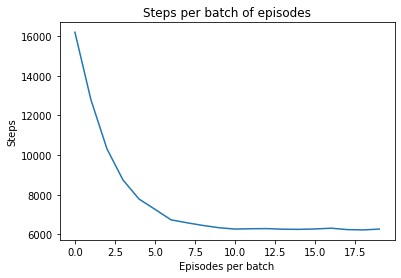

In [12]:
plt.plot(steps_per_x_episodes[:])  
plt.title('Steps per batch of episodes')
plt.ylabel('Steps') 
plt.xlabel('Episodes per batch')         
plt.savefig('Q-AGENT METRICS/Q_agent-Steps')
plt.show()

In [13]:
rewards_per_x_episodes=[]
j=0
for i in [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000]:
  rewards_per_x_episodes.append(np.array(episodes_rewards[j:i]).sum())
  j=i   

In [14]:
print(rewards_per_x_episodes[1])

print(rewards_per_x_episodes[-1])

print(len(rewards_per_x_episodes))

-83500.0
93100.0
20


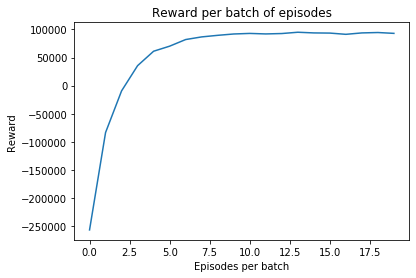

In [15]:
plt.plot(rewards_per_x_episodes[:])  
plt.title('Reward per batch of episodes')
plt.ylabel('Reward') 
plt.xlabel('Episodes per batch')       
plt.savefig('Q-AGENT METRICS/Q_agent-Batch reward')
plt.show()

In [16]:
sucessfull_percentages_per_batch=[]
failed_percentages_per_batch=[]

j=0
for i in range (len(episodes_rewards)):

  sucess_count=0
  fail_count=0

  if i%1000==0:
    s=np.array(episodes_rewards[j:i])
    for score in s:
      #print(score)
      if score==100:
        sucess_count+=1
      else:
        fail_count+=1

    success_score=sucess_count/1000 #possible variable spoil here
    fail_score= fail_count/1000

    sucessfull_percentages_per_batch.append(success_score)
    failed_percentages_per_batch.append(fail_score)

    j=i


In [17]:
sucessfull_percentages_per_batch

[0.0,
 0.053,
 0.215,
 0.353,
 0.545,
 0.675,
 0.745,
 0.827,
 0.876,
 0.899,
 0.92,
 0.93,
 0.922,
 0.932,
 0.953,
 0.942,
 0.939,
 0.917,
 0.939,
 0.947]

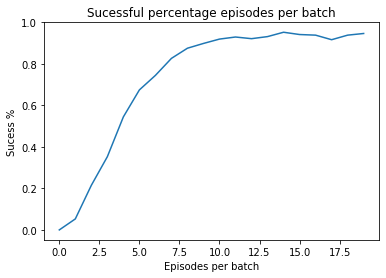

In [18]:
plt.plot(sucessfull_percentages_per_batch[:])  
plt.title('Sucessful percentage episodes per batch')
plt.ylabel('Sucess %')
plt.xlabel('Episodes per batch')         
plt.savefig('Q-AGENT METRICS/Q_AGENT-Batch-success-percentage')
plt.show()

## Testing Q-AGENT

__Testing that the Q agent has found the shortest path from a state to the terminal state, without harrasing customers__

__The agent has learned paths that give only positive rewards (reaching the final state)__

In [19]:
all_locations=Q.index
final=dict.fromkeys(all_locations,0)

for location in all_locations:
  if location not in ['F','H','L','M','P']:
    results=test_agent(q_agent.R,q_agent.Q,location,20)
    final[location]=results

final

{'A': (6, [0.0, 0.0, 0.0, 0.0, 0.0, 100.0]),
 'B': (5, [0.0, 0.0, 0.0, 0.0, 100.0]),
 'C': (4, [0.0, 0.0, 0.0, 100.0]),
 'D': (5, [0.0, 0.0, 0.0, 0.0, 100.0]),
 'E': (5, [0.0, 0.0, 0.0, 0.0, 100.0]),
 'F': 0,
 'G': (3, [0.0, 0.0, 100.0]),
 'H': 0,
 'I': (4, [0.0, 0.0, 0.0, 100.0]),
 'J': (3, [0.0, 0.0, 100.0]),
 'K': (2, [0.0, 100.0]),
 'L': 0,
 'M': 0,
 'N': (2, [0.0, 100.0]),
 'O': (1, [100.0]),
 'P': 0}

In [20]:
q_agent.Q #Learned Q matrix 

,Up,Down,Left,Right
A,NaN,3.125,NaN,3.125
B,NaN,-93.750,1.5625,6.250
C,NaN,12.500,3.1250,3.125
D,NaN,-93.750,6.2500,NaN
E,1.5625,6.250,NaN,-93.750
F,3.1250,12.500,3.1250,12.500
G,6.2500,25.000,-93.7500,-93.750
H,3.1250,-50.000,12.5000,NaN
I,3.1250,-87.500,NaN,12.500
J,-93.7500,25.000,6.2500,25.000


In [21]:
results=test_agent(q_agent.R,q_agent.Q,'E',20) # Path from E to terminal State 
results

(5, [0.0, 0.0, 0.0, 0.0, 100.0])

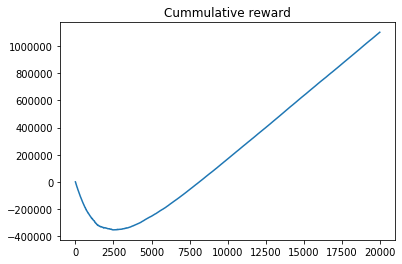

In [22]:
cummulative_rewards=[]
suma=0
for reward in episodes_rewards:
    suma=suma+reward
    cummulative_rewards.append(suma)
plt.plot(cummulative_rewards[1:])
plt.title('Cummulative reward')
plt.savefig('Q-AGENT METRICS/Q_agent-Cummulative Reward')
plt.show()

In [23]:
q_agent_steps=steps_per_x_episodes.copy()
q_agent_rewards=rewards_per_x_episodes.copy()
q_agent_sucess=sucessfull_percentages_per_batch.copy()
q_agent_cummulative_rewards=cummulative_rewards.copy()

In [24]:
print(R)
print("\n",Q)

      Up   Down   Left  Right
A    NaN    0.0    NaN    0.0
B    NaN -100.0    0.0    0.0
C    NaN    0.0    0.0    0.0
D    NaN -100.0    0.0    NaN
E    0.0    0.0    NaN -100.0
F    0.0    0.0    0.0    0.0
G    0.0    0.0 -100.0 -100.0
H    0.0 -100.0    0.0    NaN
I    0.0 -100.0    NaN    0.0
J -100.0    0.0    0.0    0.0
K    0.0    0.0    0.0 -100.0
L -100.0  100.0    0.0    NaN
M    0.0    NaN    NaN    0.0
N    0.0    NaN -100.0    0.0
O    0.0    NaN    0.0  100.0
P -100.0    NaN    0.0    NaN

     Up  Down  Left  Right
A  NaN   0.0   NaN    0.0
B  NaN   0.0   0.0    0.0
C  NaN   0.0   0.0    0.0
D  NaN   0.0   0.0    NaN
E  0.0   0.0   NaN    0.0
F  0.0   0.0   0.0    0.0
G  0.0   0.0   0.0    0.0
H  0.0   0.0   0.0    NaN
I  0.0   0.0   NaN    0.0
J  0.0   0.0   0.0    0.0
K  0.0   0.0   0.0    0.0
L  0.0   0.0   0.0    NaN
M  0.0   NaN   NaN    0.0
N  0.0   NaN   0.0    0.0
O  0.0   NaN   0.0    0.0
P  0.0   NaN   0.0    NaN


# RANDOM AGENT  

In [25]:
initial_state='A'
terminal_state='P'

random_agent=Q_Agent(R.copy(),Q.copy(),initial_state,terminal_state,discount_factor=0.5,learning_rate=0.5)

epsilon=1.0

episodes, max_steps = 20_000, 20 

episodes_steps=[]

episodes_rewards=[]

batch_count=0
for i in range(episodes):
        
    ep_stps, ep_reward = random_agent.run(max_steps,epsilon) # excute an episode, with decay

    episodes_rewards.append(ep_reward)    
    
    episodes_steps.append(ep_stps)

    if (i%1000==0):
        batch_count+=1
        print('Batch completed ',batch_count)

Batch completed  1
Batch completed  2
Batch completed  3
Batch completed  4
Batch completed  5
Batch completed  6
Batch completed  7
Batch completed  8
Batch completed  9
Batch completed  10
Batch completed  11
Batch completed  12
Batch completed  13
Batch completed  14
Batch completed  15
Batch completed  16
Batch completed  17
Batch completed  18
Batch completed  19
Batch completed  20


## Random Agent Metrics

In [26]:
steps_per_x_episodes=[]
j=0
for i in [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000]:
  steps_per_x_episodes.append(np.array(episodes_steps[j:i]).sum())
  j=i   

In [27]:
print(steps_per_x_episodes[1]) #number of steps in the first batch

print(steps_per_x_episodes[-1]) #number of steps in the last batch 

print(len(steps_per_x_episodes))

17824
17734
20


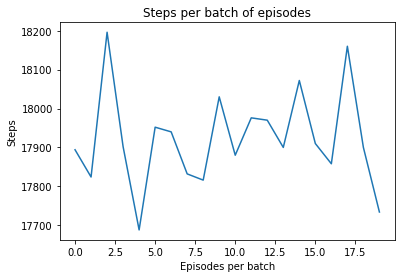

In [28]:
plt.plot(steps_per_x_episodes[:])  
plt.title('Steps per batch of episodes')
plt.ylabel('Steps') 
plt.xlabel('Episodes per batch')         
plt.savefig('RANDOM AGENT METRICS/RA-Steps per batch')
plt.show()

In [29]:
rewards_per_x_episodes=[]
j=0
for i in [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000]:
  rewards_per_x_episodes.append(np.array(episodes_rewards[j:i]).sum())
  j=i   

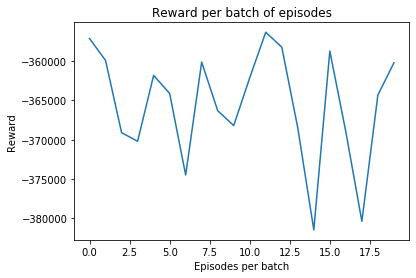

In [30]:
plt.plot(rewards_per_x_episodes[:])  
plt.title('Reward per batch of episodes')
plt.ylabel('Reward') 
plt.xlabel('Episodes per batch')     
plt.savefig('RANDOM AGENT METRICS/RA-Reward per batch')
plt.show()

In [31]:
sucessfull_percentages_per_batch=[]
failed_percentages_per_batch=[]

j=0
for i in range (len(episodes_rewards)):

  sucess_count=0
  fail_count=0

  if i%1000==0:
    s=np.array(episodes_rewards[j:i])
    
    for score in s:
      if score==100:
        sucess_count+=1
      else:
        fail_count+=1

    success_score=sucess_count/1000 
    fail_score= fail_count/1000
    
    sucessfull_percentages_per_batch.append(success_score)
    failed_percentages_per_batch.append(fail_score)

    j=i


In [32]:
sucessfull_percentages_per_batch

[0.0,
 0.024,
 0.014,
 0.017,
 0.012,
 0.02,
 0.019,
 0.011,
 0.018,
 0.009,
 0.01,
 0.012,
 0.014,
 0.024,
 0.01,
 0.014,
 0.016,
 0.014,
 0.015,
 0.014]

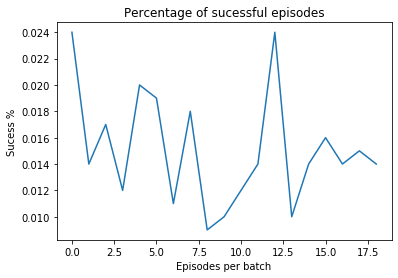

In [33]:
plt.plot(sucessfull_percentages_per_batch[1:])  
plt.title('Percentage of sucessful episodes')
plt.ylabel('Sucess %') 
plt.xlabel('Episodes per batch') 
plt.savefig('RANDOM AGENT METRICS/RA-Success percecntage per Batch')
plt.show()

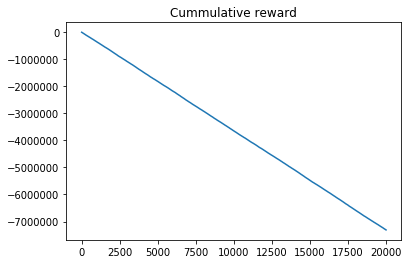

In [34]:
cummulative_rewards=[]
suma=0
for reward in episodes_rewards:
    suma=suma+reward
    cummulative_rewards.append(suma)
plt.plot(cummulative_rewards)
plt.title('Cummulative reward')
plt.savefig('RANDOM AGENT METRICS/RA-Cummulative Reward')
plt.show()

In [35]:
random_agent_cummulative_rewards=cummulative_rewards.copy()
random_agent_steps=steps_per_x_episodes.copy()
random_agent_rewards=rewards_per_x_episodes.copy()
random_agent_success=sucessfull_percentages_per_batch.copy()

# SARSA AGENT CLASS

In [36]:
class SARSA_AGENT:
    def __init__(self, r_matrix=None, q_matrix=None, initial_state='A', terminal_state='P', discount_factor=0.5, learning_rate=0.5):
        
        self.R = r_matrix
        self.Q = q_matrix

        self.s = initial_state
        
        self.a=None
        
        self.s_end = terminal_state
        
        self.discount_factor = discount_factor
        self.learning_rate = learning_rate
        
    def get_actions(self, s):
        # list of possible actions in state s
        A = self.R.loc[s,self.R.loc[s] >= -100].index
        return A.tolist()
        
    def update_q_take_step(self, action, epsilon):
          
        prev_q = self.Q.loc[self.s,action]
        reward = self.R.loc[self.s,action]
        
        s_next = get_next_state(self.s,action) #s_next, is the state you end up by taking action s_next == a
        Actions_next = self.get_actions(s_next) #possible actions to take from this next state
        
               
        # E-greedy policy, same as behaviour policy, for SARSA IMPLEMENTATION
        
        if np.random.rand() < epsilon: 
            
            #options=[self.Q.loc[s_next, a_next] for a_next in A_next] #what are the options from this new state?

            #grab the action here, which action was chosen in order to get the nxt_q?
            nxt_a =np.random.choice(Actions_next)
            #nxt_q  = np.random.choice([self.Q.loc[s_next, a_next] for a_next in A_next]) #update the previous   Q value using a random q.
            nxt_q=[self.Q.loc[s_next, nxt_a]][0]
            #print('Options',options)
            #print('Random Q chosen ', max_q)
        else:
            #print(A_next)
            #options=[self.Q.loc[s_next, a_next] for a_next in A_next] #what are the options from this new state?
            max_index  = np.argmax([self.Q.loc[s_next, a_next] for a_next in Actions_next])
            nxt_a  = Actions_next[max_index]
            nxt_q  = np.max([self.Q.loc[s_next, a_next] for a_next in Actions_next]) #update the previous   Q value using the max Q of this new state.
            #print('Options',options)
            #print('Max Q chosen  ', max_q)
        
        
        
        # Q update function
        new_q = prev_q + self.learning_rate * ((reward + (self.discount_factor * nxt_q)) - prev_q)
        
        self.Q.loc[self.s,action] = new_q
        
        #print('Q update function | Next state -->', s_next)
        
        return  s_next, reward, nxt_a
        
    def step(self, epsilon=1):
        #print('We are in state -->', self.s)
        # possible actions in state s
        Actions = self.get_actions(self.s)
        #print('Possible actions in state', self.s, '-->', A_t)
        # choose action        
        
        if self.a==None:
              if np.random.rand() < epsilon: 
                    action = np.random.choice(Actions)
              else:
                  action = self.Q.loc[self.s].idxmax()
        
        else:
              action=self.a
        # perform q-update
        #print('The action the agent chooses to take is -->', a)
        new_state, reward, new_state_action  = self.update_q_take_step(action,epsilon) 
        

        # get new state observation
        self.s = new_state
        #get the action to be performed on the new state 
        self.a= new_state_action
        #print('The new state is -->', self.s)
        return reward
        
        
    def run(self, max_steps, epsilon=1):  
        #print('E==', epsilon)
        steps = 0
        
        initial_state=self.s
        #self.s=random.choice(self.Q.index) #set random starting state for each episode, uncomment this to start an episode from a random state

        rewards=[] # all rewards for 1 episode
        
        while True:
            reward=self.step(epsilon=epsilon)
            rewards.append(reward)
            steps += 1
            if self.s == self.s_end or steps >= max_steps:
                self.s=initial_state 
                self.a=None
                break
                
        #print('steps',steps)     
        
        return steps, np.array(rewards).sum()  





    def test_run(self,test_start_location, test_max_steps, test_epsilon=0.0):  
        #print('E==', test_epsilon)
        #print('Max steps',test_max_steps)
        #print('Test location',test_location)
        
        test_steps = 0
        self.s=test_start_location  #Location that the Agent will start from
        
        test_rewards=[]
        while True:
            
            reward=self.step(epsilon=test_epsilon)
            test_rewards.append(reward)
            
            test_steps += 1
            #print('number of steps ',test_steps)
            #print('number of rewards',len(test_rewards))


            if self.s == self.s_end or test_steps >= test_max_steps: #stop if terminal state is reached, or if max steps are reached
                break
                
        #print(' final num of steps taken',test_steps)     
        
        return test_steps, test_rewards  
                


In [58]:
initial_state='A'
terminal_state='P'

sarsa_agent = SARSA_AGENT(R.copy(),Q.copy(),initial_state,terminal_state,discount_factor=0.5,learning_rate=0.5)

decay = 0.9997

min_epsilon = 0.05 # this is the minimum allowable epsilon, so the resulting policy is not 100% deterministic. 5% of actions will be random

epsilon=1.0

episodes_steps=[]

episodes, max_steps = 20_000, 20

episodes_rewards=[]

batch_count=0

for i in range(episodes):
    
    epsilon = max(min_epsilon, epsilon*decay) #pass a new epsilon that is more greedy as the number of episodes increases
    
    ep_stps, ep_reward = sarsa_agent.run(max_steps,epsilon) # excute an episode, with decay

    episodes_rewards.append(ep_reward)    
    
    episodes_steps.append(ep_stps)

    if (i%1000==0):
        batch_count+=1
        print('Batch completed',batch_count)

Batch completed 1
Batch completed 2
Batch completed 3
Batch completed 4
Batch completed 5
Batch completed 6
Batch completed 7
Batch completed 8
Batch completed 9
Batch completed 10
Batch completed 11
Batch completed 12
Batch completed 13
Batch completed 14
Batch completed 15
Batch completed 16
Batch completed 17
Batch completed 18
Batch completed 19
Batch completed 20


## SARSA AGENT METRICS

In [59]:
steps_per_x_episodes=[]
j=0
for i in [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000]:
  steps_per_x_episodes.append(np.array(episodes_steps[j:i]).sum())
  j=i   

In [60]:
print(steps_per_x_episodes[1]) #number of steps in the first batch

print(steps_per_x_episodes[-1]) #number of steps in the last batch 

print(len(steps_per_x_episodes))

16106
10762
20


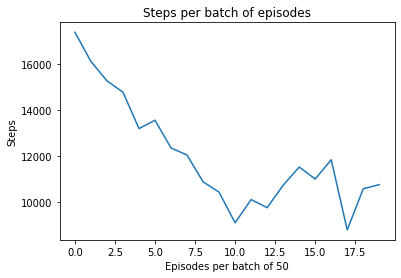

In [61]:
plt.plot(steps_per_x_episodes[:])  
plt.title('Steps per batch of episodes')
plt.ylabel('Steps') 
plt.xlabel('Episodes per batch of 50')        
plt.savefig('SARSA-AGENT METRICS/S_Agent-Steps per batch')
plt.show()

In [62]:
rewards_per_x_episodes=[]
j=0
for i in [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000]:
  rewards_per_x_episodes.append(np.array(episodes_rewards[j:i]).sum())
  j=i   

In [63]:
print(rewards_per_x_episodes[1])

print(rewards_per_x_episodes[-1])

print(len(rewards_per_x_episodes))

-155900.0
62200.0
20


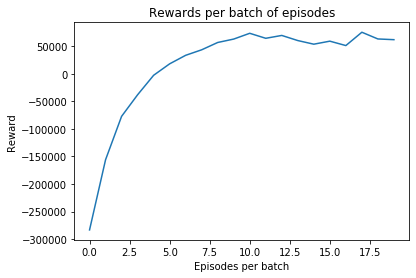

In [64]:
plt.plot(rewards_per_x_episodes[:])  
plt.title('Rewards per batch of episodes')
plt.ylabel('Reward') 
plt.xlabel('Episodes per batch')    
plt.savefig('SARSA-AGENT METRICS/S_Agent-Reward per batch')
plt.show()

In [65]:
sucessfull_percentages_per_batch=[]
failed_percentages_per_batch=[]

j=0
for i in range (len(episodes_rewards)):

  sucess_count=0
  fail_count=0

  if i%1000==0:
    s=np.array(episodes_rewards[j:i])

    for score in s:
      #print(score)
      if score==100:
        sucess_count+=1
      else:
        fail_count+=1

    success_score=sucess_count/1000 
    fail_score= fail_count/1000

    sucessfull_percentages_per_batch.append(success_score)
    failed_percentages_per_batch.append(fail_score)

    j=i


In [66]:
sucessfull_percentages_per_batch

[0.0,
 0.023,
 0.075,
 0.165,
 0.241,
 0.363,
 0.388,
 0.466,
 0.508,
 0.627,
 0.679,
 0.753,
 0.696,
 0.727,
 0.651,
 0.589,
 0.605,
 0.571,
 0.777,
 0.646]

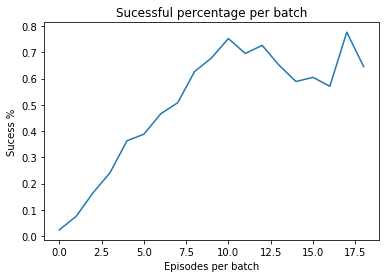

In [67]:
plt.plot(sucessfull_percentages_per_batch[1:])  
plt.title('Sucessful percentage per batch')
plt.ylabel('Sucess %') 
plt.xlabel('Episodes per batch')        
plt.savefig('SARSA-AGENT METRICS/S_Agent-Success percentage')
plt.show()

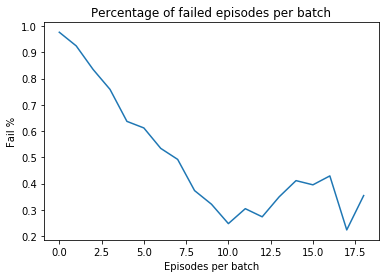

In [68]:
plt.plot(failed_percentages_per_batch[1:])  
plt.title('Percentage of failed episodes per batch')
plt.ylabel('Fail %') 
plt.xlabel('Episodes per batch')   
plt.savefig('SARSA-AGENT METRICS/S_Agent-Fail percentage')
plt.show()

In [69]:
def test_agent(R,learned_Q,start_location,max_steps):


  test_agent=SARSA_AGENT(R,learned_Q,'A','P') #create a trained agent (Learned Q)

  stps, rewards = test_agent.test_run(start_location,max_steps,0)#execute an episode to find the terminal state P with 0.0 epsillon 


  return stps, rewards


In [70]:
all_locations=Q.index
final=dict.fromkeys(all_locations,0)

for location in all_locations:
  if location not in ['F','H','L','M','P']:
    results=test_agent(sarsa_agent.R,sarsa_agent.Q,location,20)
    final[location]=results

#print(final)

In [71]:
final

{'A': (6, [0.0, 0.0, 0.0, 0.0, 0.0, 100.0]),
 'B': (5, [0.0, 0.0, 0.0, 0.0, 100.0]),
 'C': (4, [0.0, 0.0, 0.0, 100.0]),
 'D': (5, [0.0, 0.0, 0.0, 0.0, 100.0]),
 'E': (7, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0]),
 'F': 0,
 'G': (3, [0.0, 0.0, 100.0]),
 'H': 0,
 'I': (8, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0]),
 'J': (3, [0.0, 0.0, 100.0]),
 'K': (2, [0.0, 100.0]),
 'L': 0,
 'M': 0,
 'N': (2, [0.0, 100.0]),
 'O': (1, [100.0]),
 'P': 0}

In [72]:
results=test_agent(sarsa_agent.R,sarsa_agent.Q,'J',20) # Sarsa agent path from J to terminal state
results

(3, [0.0, 0.0, 100.0])

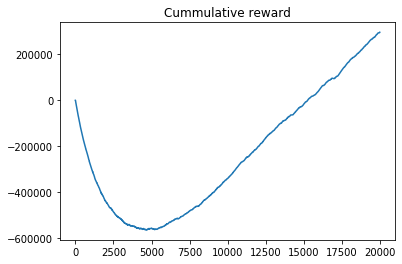

In [73]:
cummulative_rewards=[]
suma=0

for reward in episodes_rewards:
    suma=suma+reward
    cummulative_rewards.append(suma)

plt.plot(cummulative_rewards[1:])
plt.title('Cummulative reward')
plt.savefig('SARSA-AGENT METRICS/S_Agent-Cummulative Reward')
plt.show()

In [74]:
sarsa_agent_steps=steps_per_x_episodes.copy()
sarsa_agent_rewards=rewards_per_x_episodes.copy()
sarsa_agent_success=sucessfull_percentages_per_batch.copy()
sarsa_agent_cummulative_rewards=cummulative_rewards.copy()

# COMPARISON OF AGENTS

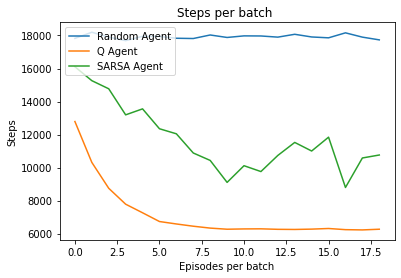

In [75]:
plt.plot(random_agent_steps[1:],label='Random Agent') 
plt.plot(q_agent_steps[1:],label='Q Agent')
plt.plot(sarsa_agent_steps[1:],label='SARSA Agent')

plt.title('Steps per batch ')
plt.ylabel('Steps') 
plt.xlabel('Episodes per batch')   

plt.legend(loc='upper left')
plt.savefig('COMPILED METRICS/Comparison-Steps per batch')
plt.show()

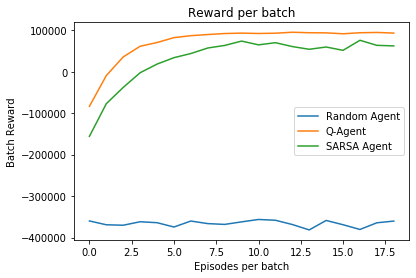

In [76]:
plt.plot(random_agent_rewards[1:],label='Random Agent')  
plt.plot(q_agent_rewards[1:],label='Q-Agent')
plt.plot(sarsa_agent_rewards[1:],label='SARSA Agent')

plt.title('Reward per batch')
plt.ylabel('Batch Reward') 
plt.xlabel('Episodes per batch')    

plt.legend()
plt.savefig('COMPILED METRICS/Comparison-Reward per batch',bbox_inches = "tight")
plt.show()

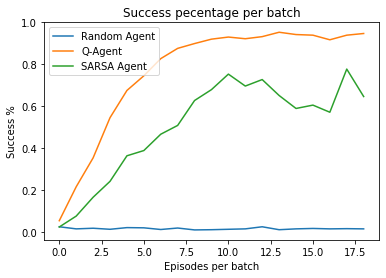

In [77]:
plt.plot(random_agent_success[1:],label='Random Agent')  
plt.plot(q_agent_sucess[1:],label='Q-Agent')  
plt.plot(sarsa_agent_success[1:],label='SARSA Agent')  

plt.title('Success pecentage per batch')
plt.ylabel('Success %') 
plt.xlabel('Episodes per batch')     

plt.legend()
plt.savefig('COMPILED METRICS/Comparison-Success percentage per batch')
plt.show()


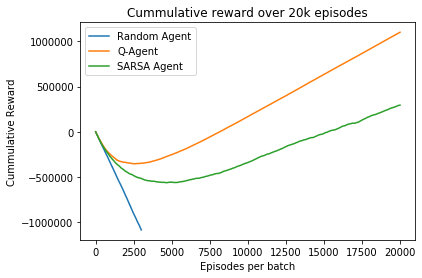

In [78]:
plt.plot(random_agent_cummulative_rewards[1:3000],label='Random Agent')  
plt.plot(q_agent_cummulative_rewards[1:],label='Q-Agent')  
plt.plot(sarsa_agent_cummulative_rewards[1:],label='SARSA Agent')  

plt.title('Cummulative reward over 20k episodes')
plt.ylabel('Cummulative Reward') 
plt.xlabel('Episodes per batch')     

plt.legend()
plt.savefig('COMPILED METRICS/cComparion-Cummulative reward')
plt.show()